In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, recall_score, confusion_matrix, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('health care diabetes.csv')

In [4]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:

##### Glucose, BloodPressure, SkinThickness, Insulin, BMI

In [7]:
cols_zero_as_null = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
df[cols_zero_as_null] = df[cols_zero_as_null].replace(0,np.NaN)

In [8]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [10]:
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [11]:
df.isna().sum(axis=1).max()

4

In [12]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Visually explore these variables using histograms. Treat the missing values accordingly.

<AxesSubplot: >

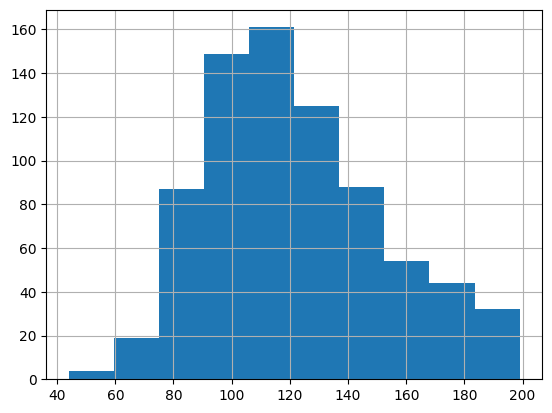

In [13]:
df.Glucose.hist()

<AxesSubplot: >

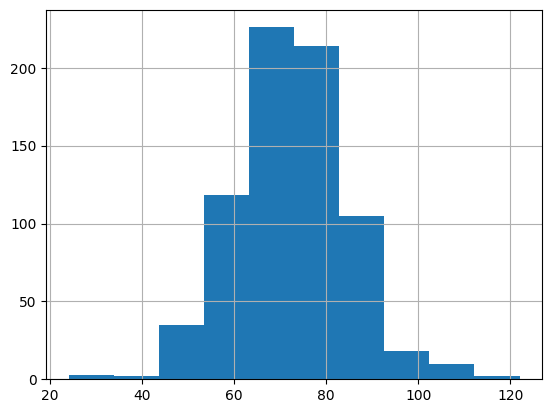

In [14]:
df.BloodPressure.hist()

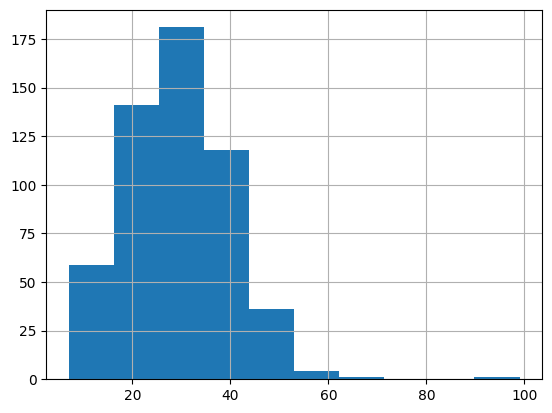

In [15]:
df.SkinThickness.hist();

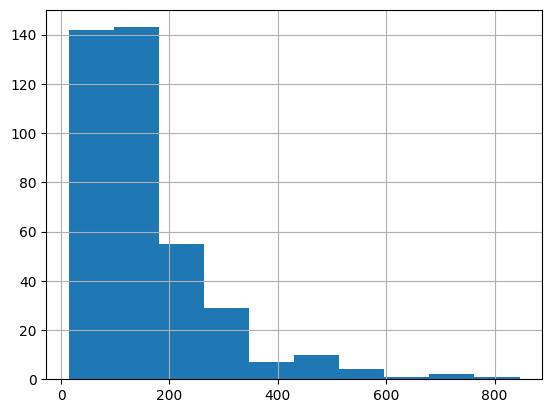

In [16]:
df.Insulin.hist();

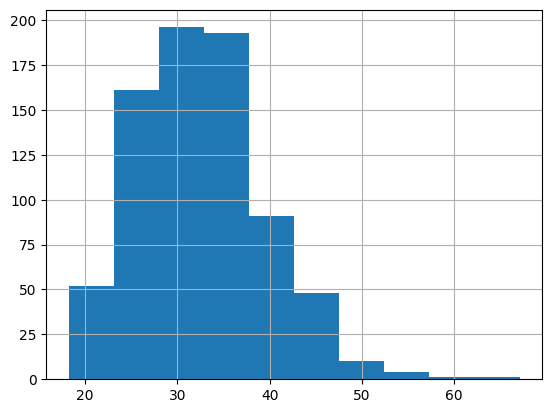

In [17]:
df.BMI.hist();

From above histograms it's clear that 'Insulin' has highly skewed data distribution and remaining 4 variables have relatively balanced data distribution therefore we'll treat missing values as follows.

['Glusose','BloodPressure', 'SkinThickness', 'BMI'] - replace missing values with mean of values

['Insulin'] - replace missing values with median of values

In [18]:
cols_mean = ['Glucose','BloodPressure', 'SkinThickness', 'BMI']
df[cols_mean] = df[cols_mean].fillna(df[cols_mean].mean())

In [19]:
df.Insulin = df.Insulin.fillna(df.Insulin.median())

In [20]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,125.0,30.1,0.349,47,1


In [21]:
df.isna().sum().sum()

0

#### There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables.

<AxesSubplot: >

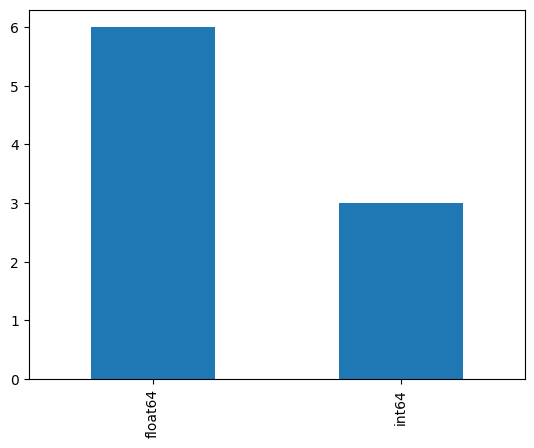

In [22]:
df.dtypes.value_counts().plot(kind='bar')

#### Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action

0    500
1    268
Name: Outcome, dtype: int64

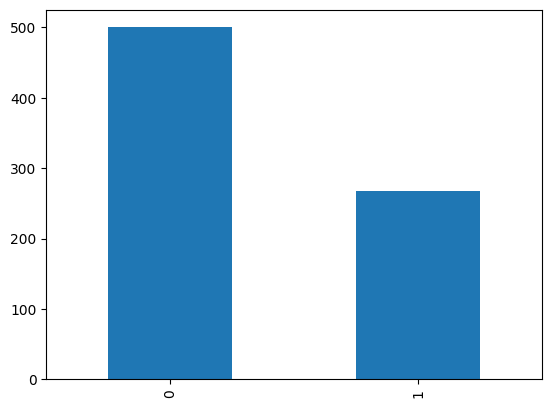

In [23]:
df.Outcome.value_counts().plot(kind='bar');
df.Outcome.value_counts()

Since classes in 'Outcome' are little skewed so we will generate new samples using SMOTE (Synthetic Minority Oversampling Techinique) for the class '1' which is under-represented in data.

We will use SMOTE because ->  1. It generates new samples by interpolation
                             2. It dosen't duplicate data

In [24]:
X = df.drop('Outcome',axis=1)
y = df.Outcome

X.shape,y.shape

((768, 8), (768,))

In [25]:
sm = SMOTE(random_state=0)

X_res,y_res = sm.fit_resample(X,y)

X_res.shape,y_res.shape

((1000, 8), (1000,))

In [26]:
df_res = pd.concat([X_res,y_res],axis=1)

1    500
0    500
Name: Outcome, dtype: int64

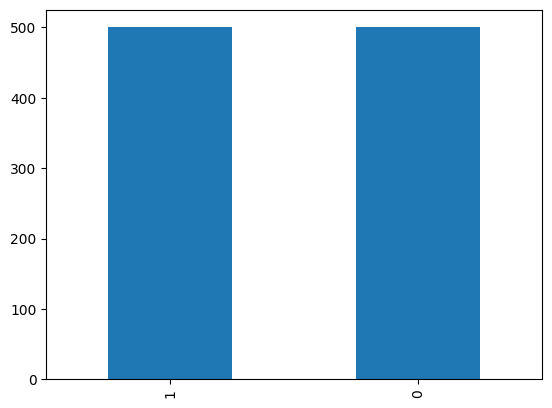

In [27]:
df_res.Outcome.value_counts().plot(kind='bar');
df_res.Outcome.value_counts()

#### Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

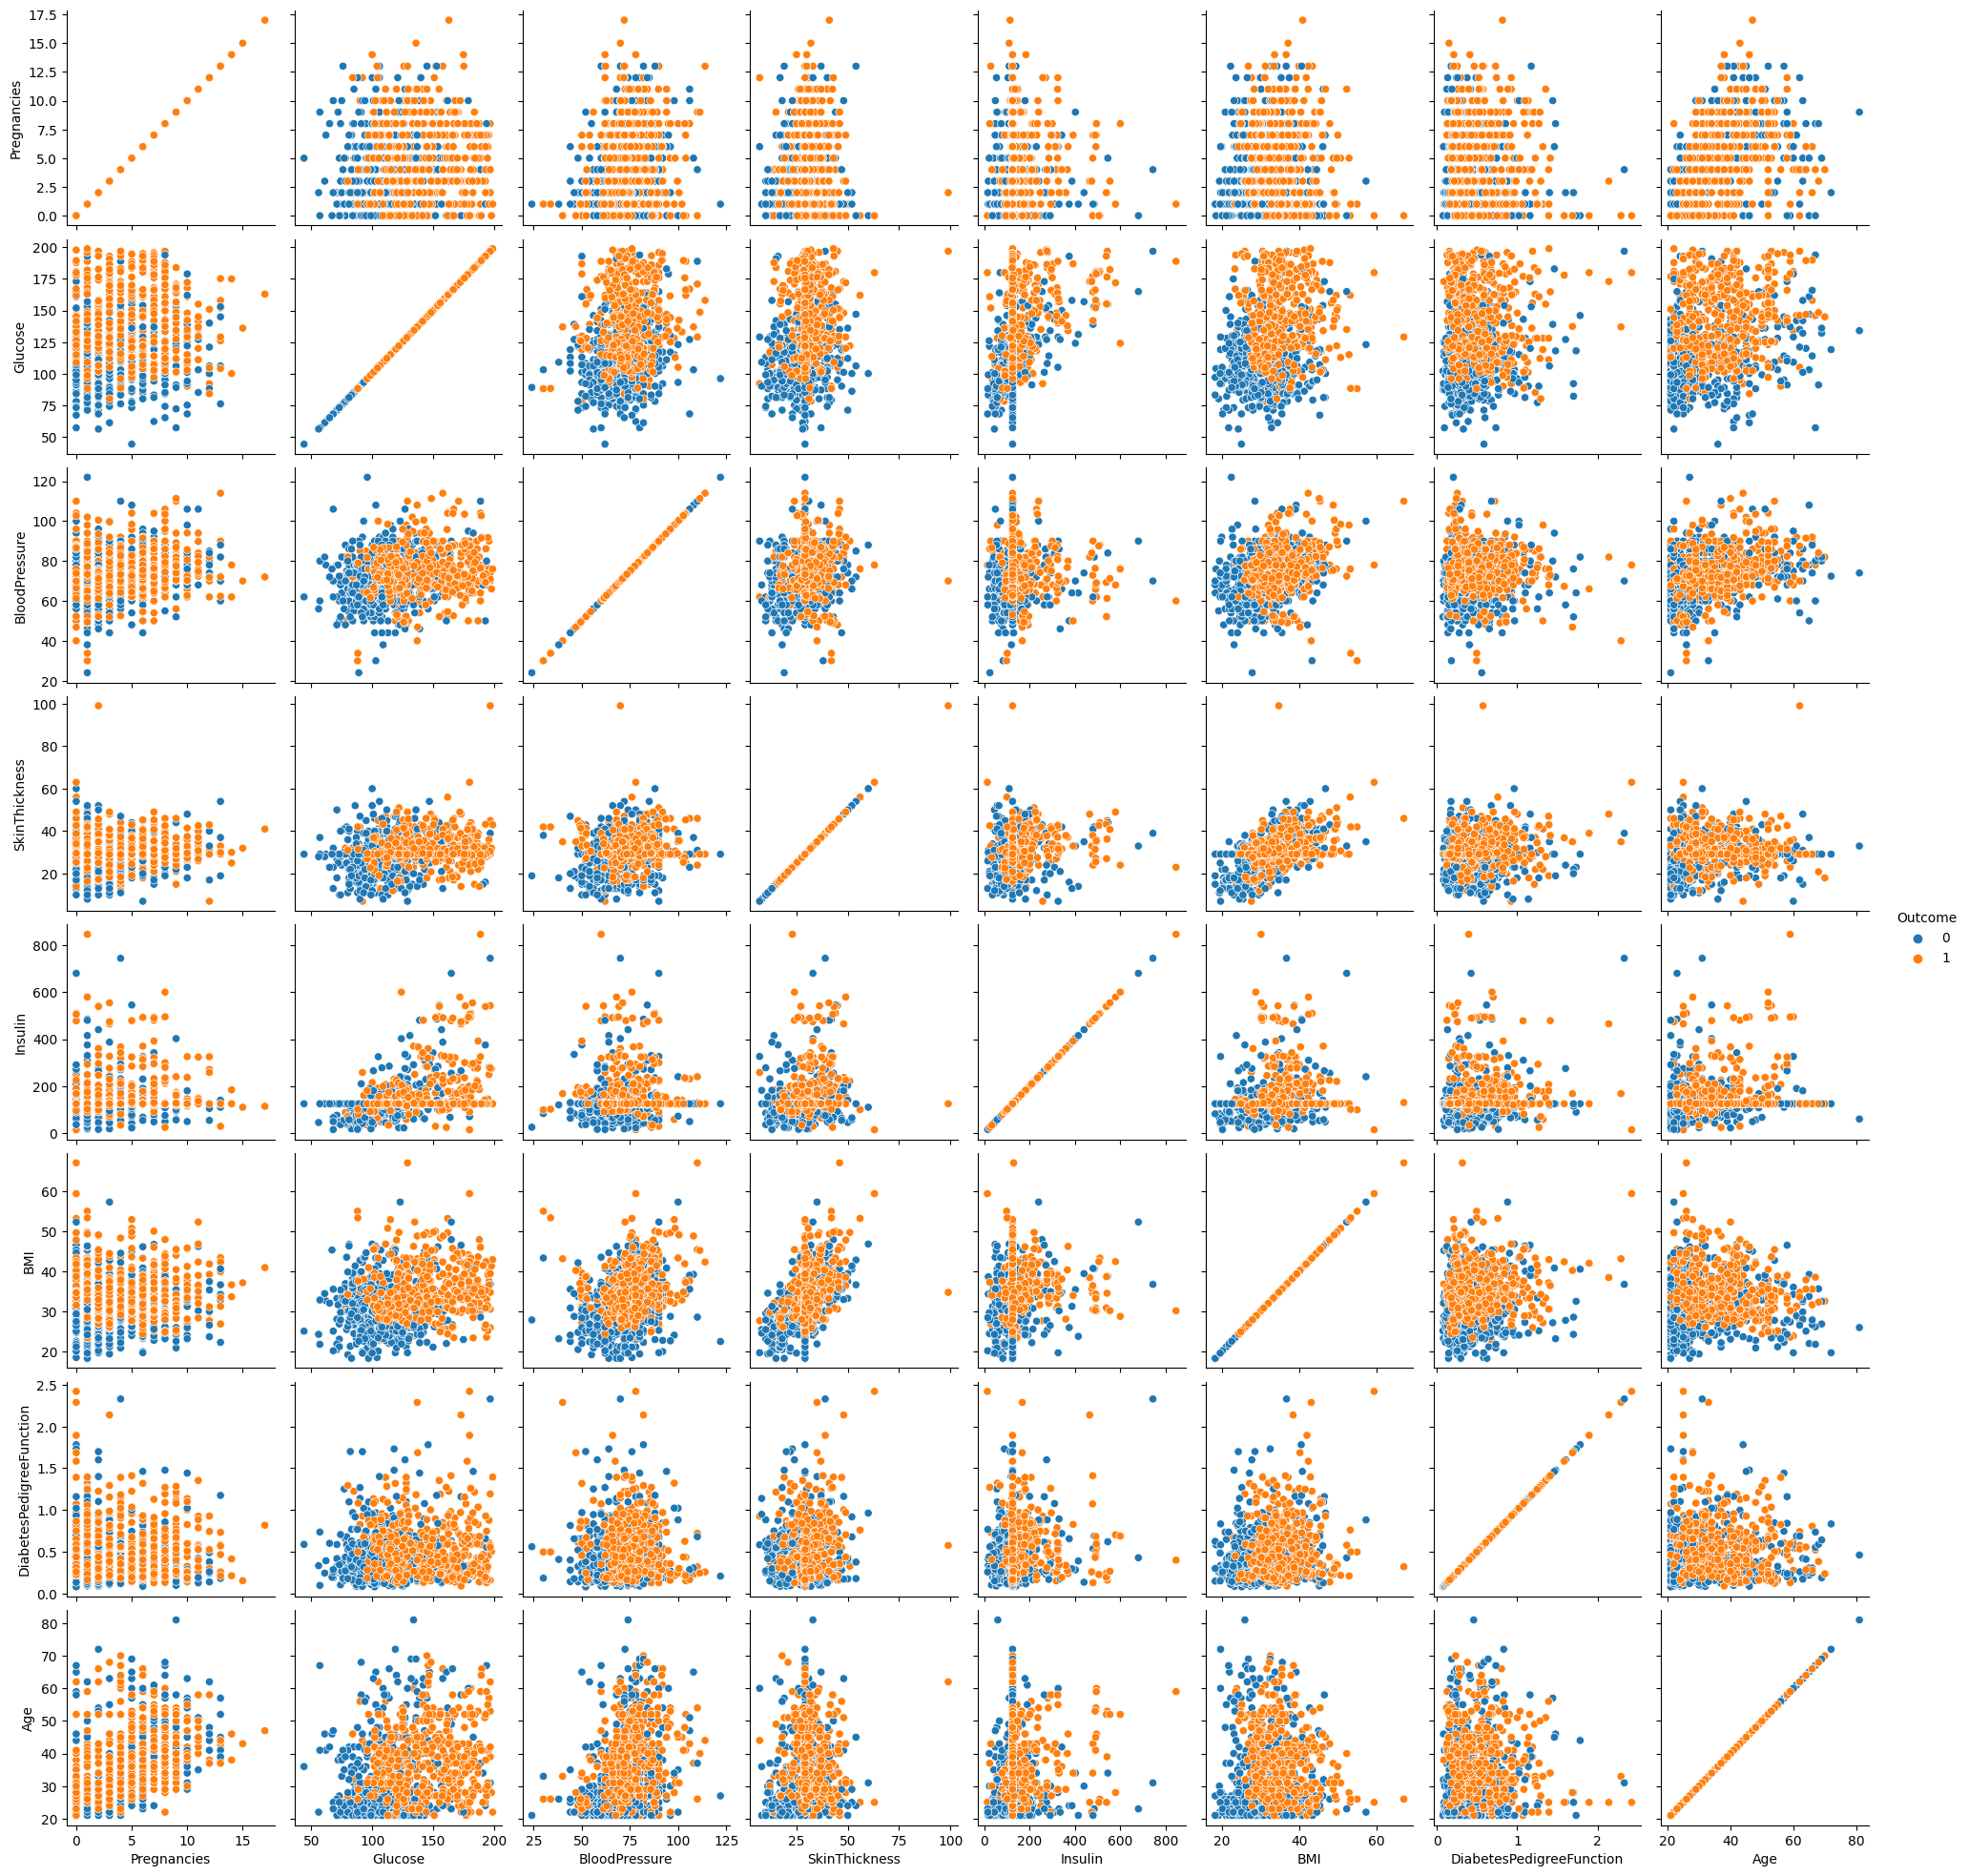

In [28]:
sns.pairplot(data=df_res,hue='Outcome',diag_kind=None);

#### Perform correlation analysis. Visually explore it using a heat map.

In [29]:
df_res.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129887,0.219489,0.074535,0.018189,0.008048,-0.050263,0.540707,0.221607
Glucose,0.129887,1.000000,0.212820,0.196410,0.407835,0.246118,0.100204,0.273134,0.515310
BloodPressure,0.219489,0.212820,1.000000,0.186109,0.025644,0.281734,-0.016595,0.338135,0.176170
SkinThickness,0.074535,0.196410,0.186109,1.000000,0.187768,0.535340,0.110857,0.110717,0.235064
Insulin,0.018189,0.407835,0.025644,0.187768,1.000000,0.167633,0.102761,0.127371,0.219054
BMI,0.008048,0.246118,0.281734,0.535340,0.167633,1.000000,0.154790,0.016392,0.324473
DiabetesPedigreeFunction,-0.050263,0.100204,-0.016595,0.110857,0.102761,0.154790,1.000000,0.010605,0.159824
Age,0.540707,0.273134,0.338135,0.110717,0.127371,0.016392,0.010605,1.000000,0.260513
Outcome,0.221607,0.515310,0.176170,0.235064,0.219054,0.324473,0.159824,0.260513,1.000000


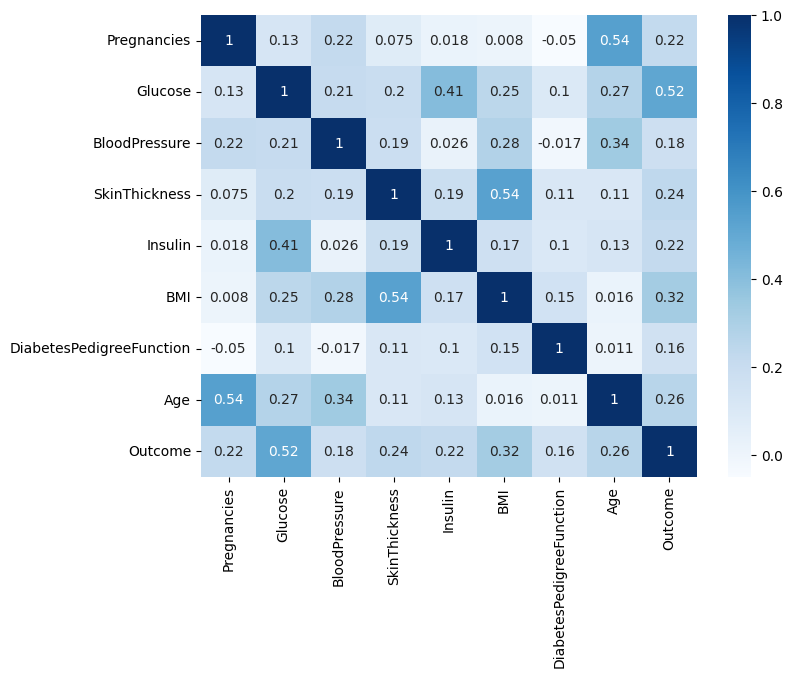

In [30]:
plt.figure(figsize=(8,6))
sns.heatmap(df_res.corr(),annot=True,cmap='Blues');

Pregnancies                 0.221607
Glucose                     0.515310
BloodPressure               0.176170
SkinThickness               0.235064
Insulin                     0.219054
BMI                         0.324473
DiabetesPedigreeFunction    0.159824
Age                         0.260513
Outcome                     1.000000
Name: Outcome, dtype: float64

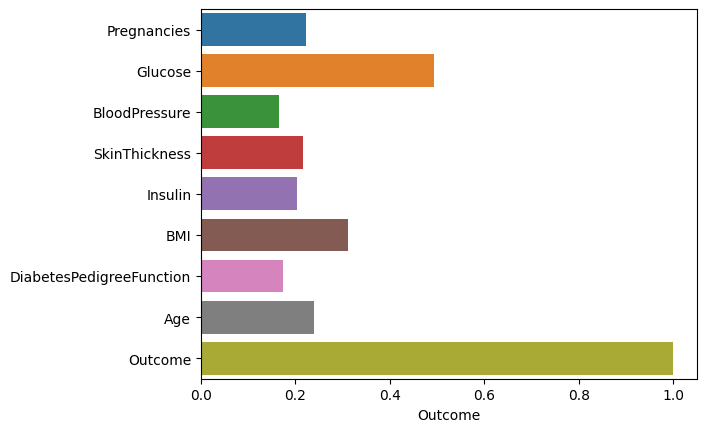

In [31]:
sns.barplot(y=df_res.columns,x=df.corr()['Outcome']);
df_res.corr()['Outcome']

#### Data Modeling:

##### Devise strategies for model building. It is important to decide the right validation framework. Express your thought process. 

Since it's a classification problem, we'll be building models using following classification algorithms for our training data and then compare performance of each model on test data to accurately predict target variable (Outcome):

1. Logistic Regression
2. Support Vector Machine (SVM)
3. K-Nearest Neighbour (KNN)
4. Decision Tree
5. RandomForest Classifier
6. Ensemble Learning -> Boosting -> Gradient Boosting (XGBClassifier)

In [32]:
# Using train_test_split to split data in training data and testing data. So we can validate our models

df_train,df_test = train_test_split(df_res, test_size=0.2, random_state=0)

In [33]:
df_train.shape, df_test.shape

((800, 9), (200, 9))

In [34]:
# Scaling data

scaler = StandardScaler()

df_train.iloc[:,:-1] = scaler.fit_transform(df_train.iloc[:,:-1])
df_test.iloc[:,:-1] = scaler.transform(df_test.iloc[:,:-1])

#### Apply an appropriate classification algorithm to build a model.

In [35]:
models_name,models_accuracy,models_f1,models_roc_auc = [],[],[],[]

In [36]:
# Logistic Regression

model_log = LogisticRegression(random_state=0)

model_log.fit(df_train.iloc[:,:-1],df_train.Outcome)

LogisticRegression(random_state=0)

In [37]:
yp = model_log.predict(df_test.iloc[:,:-1])
# yp

In [38]:
model_score = model_log.score(df_test.iloc[:,:-1],df_test.Outcome)
model_score

0.78

In [39]:
f1 = f1_score(df_test.Outcome,yp)
f1

0.7659574468085107

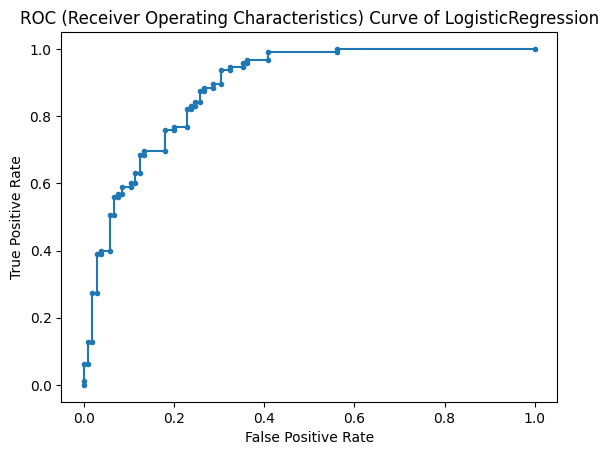

In [40]:
# ROC Curve
yp_probs = model_log.predict_proba(df_test.iloc[:,:-1]) # Predict Probabilities
yp_probs = yp_probs[:,1] # Only Probabilities of +ve Outcome

#The ROC AUC score tells us how efficient the model is.
#The higher the AUC, the better the model's performance at distinguishing between the positive and negative classes.
#An AUC score of 1 means the classifier can perfectly distinguish between all the Positive and the Negative class points.

model_roc_auc = roc_auc_score(df_test.Outcome,yp_probs) 

# FPR - False Positive Rate
# TPR - True Positive Rate
FPR,TPR,Thresholds = roc_curve(df_test.Outcome,yp_probs) # roc_curve

plt.plot(FPR,TPR,marker='.')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve of LogisticRegression");

In [41]:
models_name.append('LogisticRegression')
models_accuracy.append(model_score)
models_f1.append(f1)
models_roc_auc.append(model_roc_auc)

In [42]:
# Support Vector Machines (SVM)

# SVM rbf kernel

# In SVM by default probability=False
# To find probability set probability=True
model_svm_rbf = SVC(random_state=0, probability=True)

model_svm_rbf.fit(df_train.iloc[:,:-1],df_train.Outcome)

SVC(probability=True, random_state=0)

In [43]:
yp = model_svm_rbf.predict(df_test.iloc[:,:-1])
# yp

In [44]:
model_score = model_svm_rbf.score(df_test.iloc[:,:-1],df_test.Outcome)
model_score

0.89

In [45]:
f1 = f1_score(df_test.Outcome,yp)
f1

0.8877551020408163

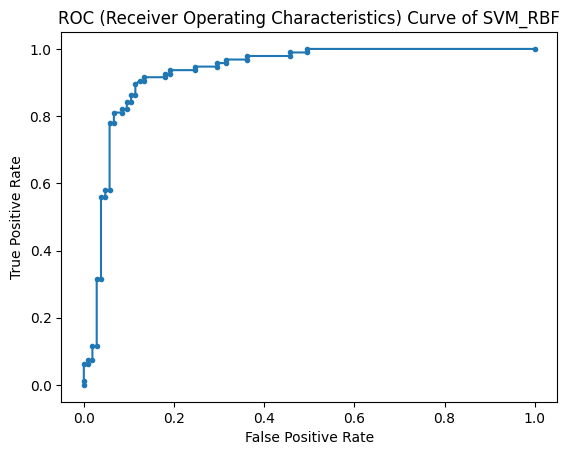

In [46]:
# ROC Curve
yp_probs = model_svm_rbf.predict_proba(df_test.iloc[:,:-1]) # Predict Probabilities
yp_probs = yp_probs[:,1] # Only Probabilities of +ve Outcome

model_roc_auc = roc_auc_score(df_test.Outcome,yp_probs) 

# FPR - False Positive Rate
# TPR - True Positive Rate
FPR,TPR,Thresholds = roc_curve(df_test.Outcome,yp_probs) # roc_curve

plt.plot(FPR,TPR,marker='.')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve of SVM_RBF");

In [47]:
models_name.append('SVM_RBF')
models_accuracy.append(model_score)
models_f1.append(f1)
models_roc_auc.append(model_roc_auc)

In [48]:
# SVM poly kernel

model_svm_poly = SVC(kernel='poly',random_state=0, probability=True)

model_svm_poly.fit(df_train.iloc[:,:-1],df_train.Outcome)

SVC(kernel='poly', probability=True, random_state=0)

In [49]:
yp = model_svm_poly.predict(df_test.iloc[:,:-1])
# yp

In [50]:
model_score = model_svm_poly.score(df_test.iloc[:,:-1],df_test.Outcome)
model_score

0.835

In [51]:
f1 = f1_score(df_test.Outcome,yp)
f1

0.8390243902439025

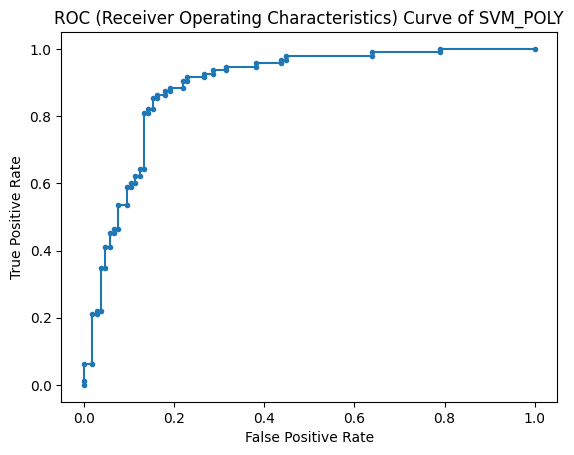

In [52]:
# ROC Curve
yp_probs = model_svm_poly.predict_proba(df_test.iloc[:,:-1]) # Predict Probabilities
yp_probs = yp_probs[:,1] # Only Probabilities of +ve Outcome

model_roc_auc = roc_auc_score(df_test.Outcome,yp_probs) 

# FPR - False Positive Rate
# TPR - True Positive Rate
FPR,TPR,Thresholds = roc_curve(df_test.Outcome,yp_probs) # roc_curve

plt.plot(FPR,TPR,marker='.')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve of SVM_POLY");

In [53]:
models_name.append('SVM_Poly')
models_accuracy.append(model_score)
models_f1.append(f1)
models_roc_auc.append(model_roc_auc)

In [54]:
# K-Nearest Neighbor (KNN)

for i in range(3,22,2):
    model_knn = KNeighborsClassifier(n_neighbors=i,n_jobs=4)
    model_knn.fit(df_train.iloc[:,:-1],df_train.Outcome)
    yp = model_knn.predict(df_test.iloc[:,:-1])
    model_score = model_knn.score(df_test.iloc[:,:-1],df_test.Outcome)
    f1 = f1_score(df_test.Outcome,yp)
    print('no of neighbors - ',i,'model_score - ',model_score,'f1_score - ',f1)

no of neighbors -  3 model_score -  0.795 f1_score -  0.7939698492462313
no of neighbors -  5 model_score -  0.81 f1_score -  0.81
no of neighbors -  7 model_score -  0.815 f1_score -  0.8159203980099502
no of neighbors -  9 model_score -  0.82 f1_score -  0.8200000000000001
no of neighbors -  11 model_score -  0.815 f1_score -  0.821256038647343
no of neighbors -  13 model_score -  0.795 f1_score -  0.8038277511961722
no of neighbors -  15 model_score -  0.83 f1_score -  0.8333333333333333
no of neighbors -  17 model_score -  0.83 f1_score -  0.8349514563106797
no of neighbors -  19 model_score -  0.85 f1_score -  0.8543689320388349
no of neighbors -  21 model_score -  0.835 f1_score -  0.8436018957345971


From above it's concluded that n_neighbors=19 gives better accuracy in comparision of other n_neighbors. 
For model building we'll be using n_neighbors=19

In [55]:
model_knn = KNeighborsClassifier(n_neighbors=19,n_jobs=4)

model_knn.fit(df_train.iloc[:,:-1],df_train.Outcome)

KNeighborsClassifier(n_jobs=4, n_neighbors=19)

In [56]:
yp = model_knn.predict(df_test.iloc[:,:-1])
# yp

In [57]:
model_score = model_knn.score(df_test.iloc[:,:-1],df_test.Outcome)
model_score

0.85

In [58]:
f1 = f1_score(df_test.Outcome,yp)
f1

0.8543689320388349

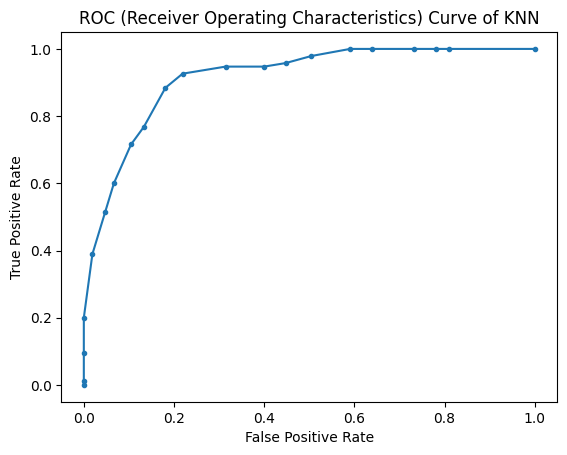

In [59]:
# ROC Curve
yp_probs = model_knn.predict_proba(df_test.iloc[:,:-1]) # Predict Probabilities
yp_probs = yp_probs[:,1] # Only Probabilities of +ve Outcome

model_roc_auc = roc_auc_score(df_test.Outcome,yp_probs)

# FPR - False Positive Rate
# TPR - True Positive Rate
FPR,TPR,Thresholds = roc_curve(df_test.Outcome,yp_probs) # roc_curve

plt.plot(FPR,TPR,marker='.')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve of KNN");

In [60]:
models_name.append('KNN_19')
models_accuracy.append(model_score)
models_f1.append(f1)
models_roc_auc.append(model_roc_auc)

In [61]:
# Parameter tunning using Grid Search CV

params_dt = {'max_depth':[2,3,4,5], 'min_samples_leaf':[2,3,4,5]}
params_rf = {'n_estimators':[50,75,100,120,150], 'max_depth':[2,3,4,5], 'min_samples_leaf':[2,3,4,5]}
params_xgb = parameters = {'max_depth':range(2,10), 'n_estimators':range(50, 175, 25), 'learning_rate':[0.1, 0.01, 0.05]}

In [62]:
# Decision Tree

grid_cv = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=params_dt, cv=5, n_jobs=20, verbose=2)

grid_cv.fit(df_train.iloc[:,:-1],df_train.Outcome)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=20,
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_leaf': [2, 3, 4, 5]},
             verbose=2)

In [63]:
grid_cv.best_params_

{'max_depth': 4, 'min_samples_leaf': 2}

In [64]:
model_dt = DecisionTreeClassifier(random_state=0,max_depth=4,min_samples_leaf=2)

model_dt.fit(df_train.iloc[:,:-1],df_train.Outcome)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=2, random_state=0)

In [65]:
yp = model_dt.predict(df_test.iloc[:,:-1])
# yp

In [66]:
model_score = model_dt.score(df_test.iloc[:,:-1],df_test.Outcome)
model_score

0.79

In [67]:
f1 = f1_score(df_test.Outcome,yp)
f1

0.7789473684210526

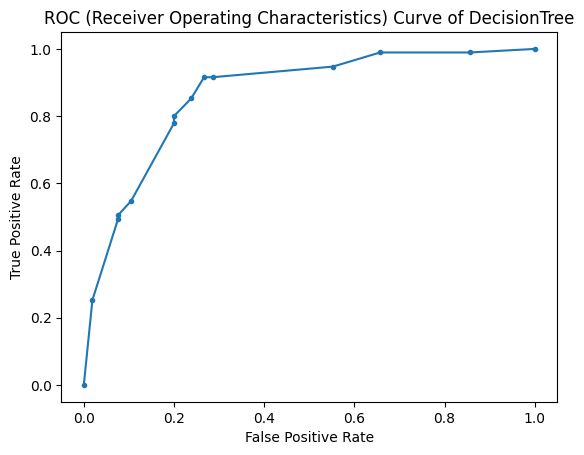

In [68]:
# ROC Curve
yp_probs = model_dt.predict_proba(df_test.iloc[:,:-1]) # Predict Probabilities
yp_probs = yp_probs[:,1] # Only Probabilities of +ve Outcome

model_roc_auc = roc_auc_score(df_test.Outcome,yp_probs)

# FPR - False Positive Rate
# TPR - True Positive Rate
FPR,TPR,Thresholds = roc_curve(df_test.Outcome,yp_probs) # roc_curve

plt.plot(FPR,TPR,marker='.')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve of DecisionTree");

In [69]:
models_name.append('DecisionTree')
models_accuracy.append(model_score)
models_f1.append(f1)
models_roc_auc.append(model_roc_auc)

In [70]:
# Random Forest

grid_cv = GridSearchCV(RandomForestClassifier(random_state=0), param_grid=params_rf, cv=5, n_jobs=20, verbose=2)

grid_cv.fit(df_train.iloc[:,:-1],df_train.Outcome)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=20,
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'n_estimators': [50, 75, 100, 120, 150]},
             verbose=2)

In [71]:
grid_cv.best_params_

{'max_depth': 4, 'min_samples_leaf': 4, 'n_estimators': 50}

In [72]:
model_rf = RandomForestClassifier(n_estimators=50,max_depth=4,min_samples_leaf=4,random_state=0)

model_rf.fit(df_train.iloc[:,:-1],df_train.Outcome)

RandomForestClassifier(max_depth=4, min_samples_leaf=4, n_estimators=50,
                       random_state=0)

In [73]:
yp = model_rf.predict(df_test.iloc[:,:-1])
# yp

In [74]:
model_score = model_rf.score(df_test.iloc[:,:-1],df_test.Outcome)
model_score

0.855

In [75]:
f1 = f1_score(df_test.Outcome,yp)
f1

0.8585365853658536

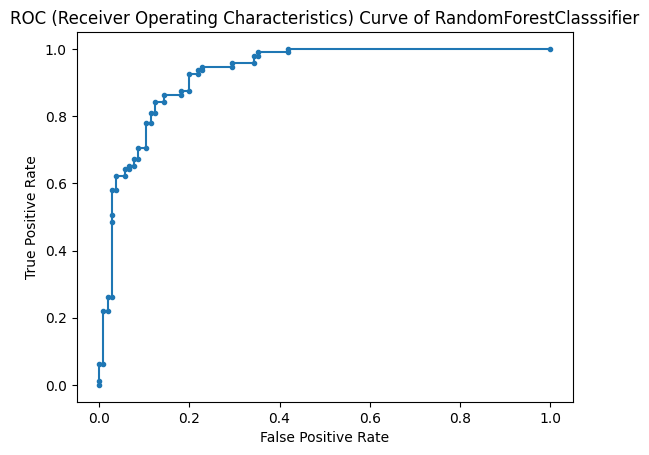

In [76]:
# ROC Curve
yp_probs = model_rf.predict_proba(df_test.iloc[:,:-1]) # Predict Probabilities
yp_probs = yp_probs[:,1] # Only Probabilities of +ve Outcome

model_roc_auc = roc_auc_score(df_test.Outcome,yp_probs)

# FPR - False Positive Rate
# TPR - True Positive Rate
FPR,TPR,Thresholds = roc_curve(df_test.Outcome,yp_probs) # roc_curve

plt.plot(FPR,TPR,marker='.')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve of RandomForestClasssifier");

In [77]:
models_name.append('RandomForest')
models_accuracy.append(model_score)
models_f1.append(f1)
models_roc_auc.append(model_roc_auc)

In [78]:
# XGBoost Classifier

grid_cv = GridSearchCV(XGBClassifier(random_state=0), param_grid=params_xgb, cv=5, n_jobs=20, verbose=2)

grid_cv.fit(df_train.iloc[:,:-1],df_train.Outcome)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=0, ...),
             n_jobs=20,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(2, 10),
                         'n_estimators': range(50, 175, 25)},
             verbose=2)

In [79]:
grid_cv.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}

In [80]:
model_xgb = XGBClassifier(random_state=0)

model_xgb.fit(df_train.iloc[:,:-1],df_train.Outcome)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

In [81]:
yp = model_xgb.predict(df_test.iloc[:,:-1])
# yp

In [82]:
model_score = model_xgb.score(df_test.iloc[:,:-1],df_test.Outcome)
model_score

0.865

In [83]:
f1 = f1_score(df_test.Outcome,yp)
f1

0.8643216080402011

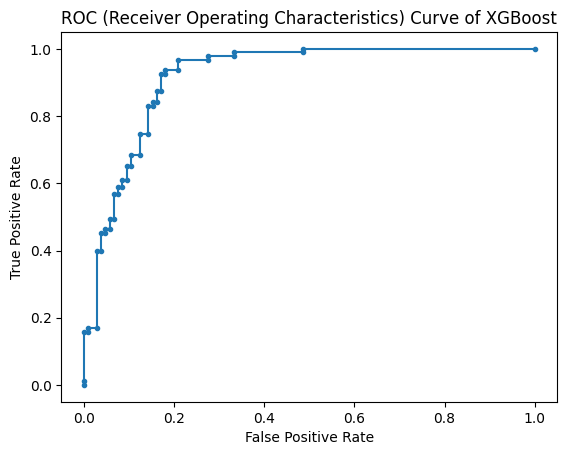

In [84]:
# ROC Curve
yp_probs = model_xgb.predict_proba(df_test.iloc[:,:-1]) # Predict Probabilities
yp_probs = yp_probs[:,1] # Only Probabilities of +ve Outcome

model_roc_auc = roc_auc_score(df_test.Outcome,yp_probs)

# FPR - False Positive Rate
# TPR - True Positive Rate
FPR,TPR,Thresholds = roc_curve(df_test.Outcome,yp_probs) # roc_curve

plt.plot(FPR,TPR,marker='.')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve of XGBoost");

In [85]:
models_name.append('XGBoost')
models_accuracy.append(model_score)
models_f1.append(f1)
models_roc_auc.append(model_roc_auc)

#### Compare various models with the results from KNN algorithm.

In [86]:
Model_Comparision = pd.DataFrame(zip(models_name,models_accuracy,models_f1,models_roc_auc),
                                 columns=['Model_name','model_score','f1_score','roc_auc_score'])
Model_Comparision.set_index('Model_name', inplace=True)
Model_Comparision

,model_score,f1_score,roc_auc_score
Model_name,,,
LogisticRegression,0.780,0.765957,0.885213
SVM_RBF,0.890,0.887755,0.931479
SVM_Poly,0.835,0.839024,0.890326
KNN_19,0.850,0.854369,0.914737
DecisionTree,0.790,0.778947,0.866015
RandomForest,0.855,0.858537,0.927018
XGBoost,0.865,0.864322,0.917694


Among all models SVM_RBF gives best accuracy_score, f1_score and roc_auc_score. 
Therefore we'll build final model using svm_rbf.

In [87]:
final_model = model_svm_rbf

#### Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc.

In [88]:
cr = classification_report(df_test.Outcome,final_model.predict(df_test.iloc[:,:-1]))
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.87      0.89       105
           1       0.86      0.92      0.89        95

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.89      0.89      0.89       200



In [89]:
cm = confusion_matrix(df_test.Outcome,final_model.predict(df_test.iloc[:,:-1]))
cm

array([[91, 14],
       [ 8, 87]], dtype=int64)

In [90]:
TN = cm[0,0] # True -ve
FP = cm[0,1] # False +ve
FN = cm[1,0] # False -ve
TP = cm[1,1] # True +ve

In [91]:
#Sensitivity and Specificity are inversely proportional to each other.
model_accuracy = final_model.score(df_test.iloc[:,:-1],df_test.Outcome)
Sensitivity = TP/(TP+FN) # sesitivity=recall
Specificity = TN/(TN+FP)

print('Accuracy :',model_accuracy,' Sensitivity :',Sensitivity,' Specificity :',Specificity)

Accuracy : 0.89  Sensitivity : 0.9157894736842105  Specificity : 0.8666666666666667
